Correlation Coefficients with Conversion Rate:
 Conversion Rate     1.000000
Time on Page        0.229669
Session Duration    0.177798
Page Views          0.126635
Previous Visits     0.109496
Bounce Rate        -0.049051
Name: Conversion Rate, dtype: float64
Mean Absolute Error (MAE): 6.439293542825908e-16


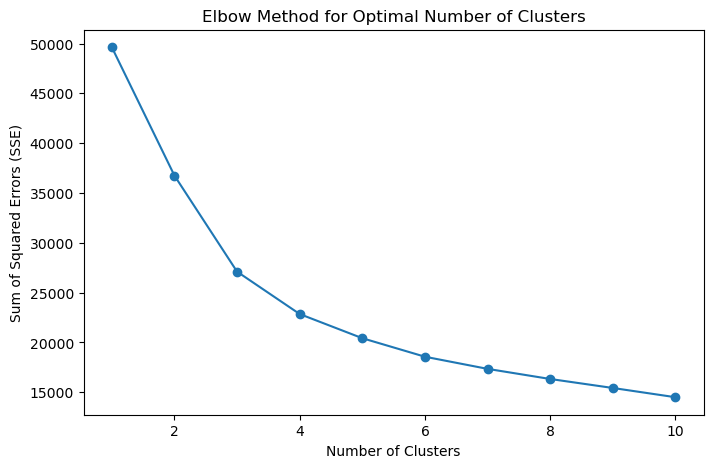

Cluster Means:
          Page Views  Session Duration  Bounce Rate  Time on Page  \
Cluster                                                            
0          7.313208          1.994288     0.285758      2.959120   
1          3.531060          1.944717     0.282543      2.813290   
2          4.759717          9.083344     0.280872      3.463099   
3          4.860656          2.240212     0.291331      8.734362   

         Previous Visits  Conversion Rate  Cluster  
Cluster                                             
0               2.098113         0.987949      0.0  
1               1.943971         0.964089      1.0  
2               1.872792         1.000000      2.0  
3               1.964481         1.000000      3.0  


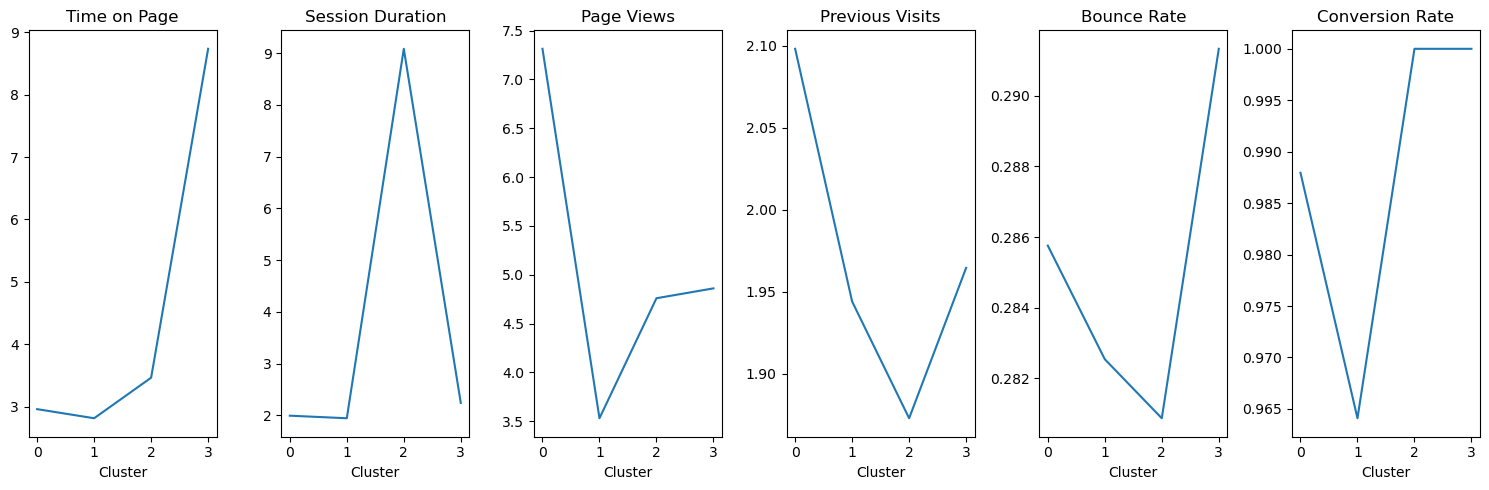

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'website_traffic.csv'
data = pd.read_csv(file_path)

# 1. Calculate correlations between Conversion Rate and other numerical columns
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[float, int])
correlations = numeric_data.corr()['Conversion Rate'].sort_values(ascending=False)
print("Correlation Coefficients with Conversion Rate:\n", correlations)

# 2. Feature Selection
# Selected features with positive correlations, excluding the categorical 'Traffic Source' column
features = ['Time on Page', 'Session Duration', 'Page Views', 'Previous Visits','Bounce Rate','Conversion Rate']
target = 'Conversion Rate'

# 4. Data Splitting
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Model Development: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Calculate MAE
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 7. Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the SSE values for different numbers of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# 8. Clustering: Apply K-means clustering with the optimal number of clusters
optimal_clusters = 4  # You can choose the optimal number based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10) 
clusters = kmeans.fit_predict(X)
data['Cluster'] = clusters

# 9. Cluster Analysis: Calculate the mean value of each feature for each cluster
# Only numeric data should be included in the mean calculation
numeric_columns = data.select_dtypes(include=[float, int]).columns
cluster_means = data.groupby('Cluster')[numeric_columns].mean()
print("Cluster Means:\n", cluster_means)

# 10. Cluster Visualization: Visualize the clusters
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))
for i, feature in enumerate(features):
    axes[i].plot(cluster_means.index, cluster_means[feature])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Cluster')
plt.tight_layout()
plt.show()